In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report,accuracy_score


In [2]:
df = pd.read_csv('dataset_linear_regression/abalone.csv')

In [3]:
df

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
encoder = LabelEncoder()

df['Type'] = encoder.fit_transform(df['Type'])

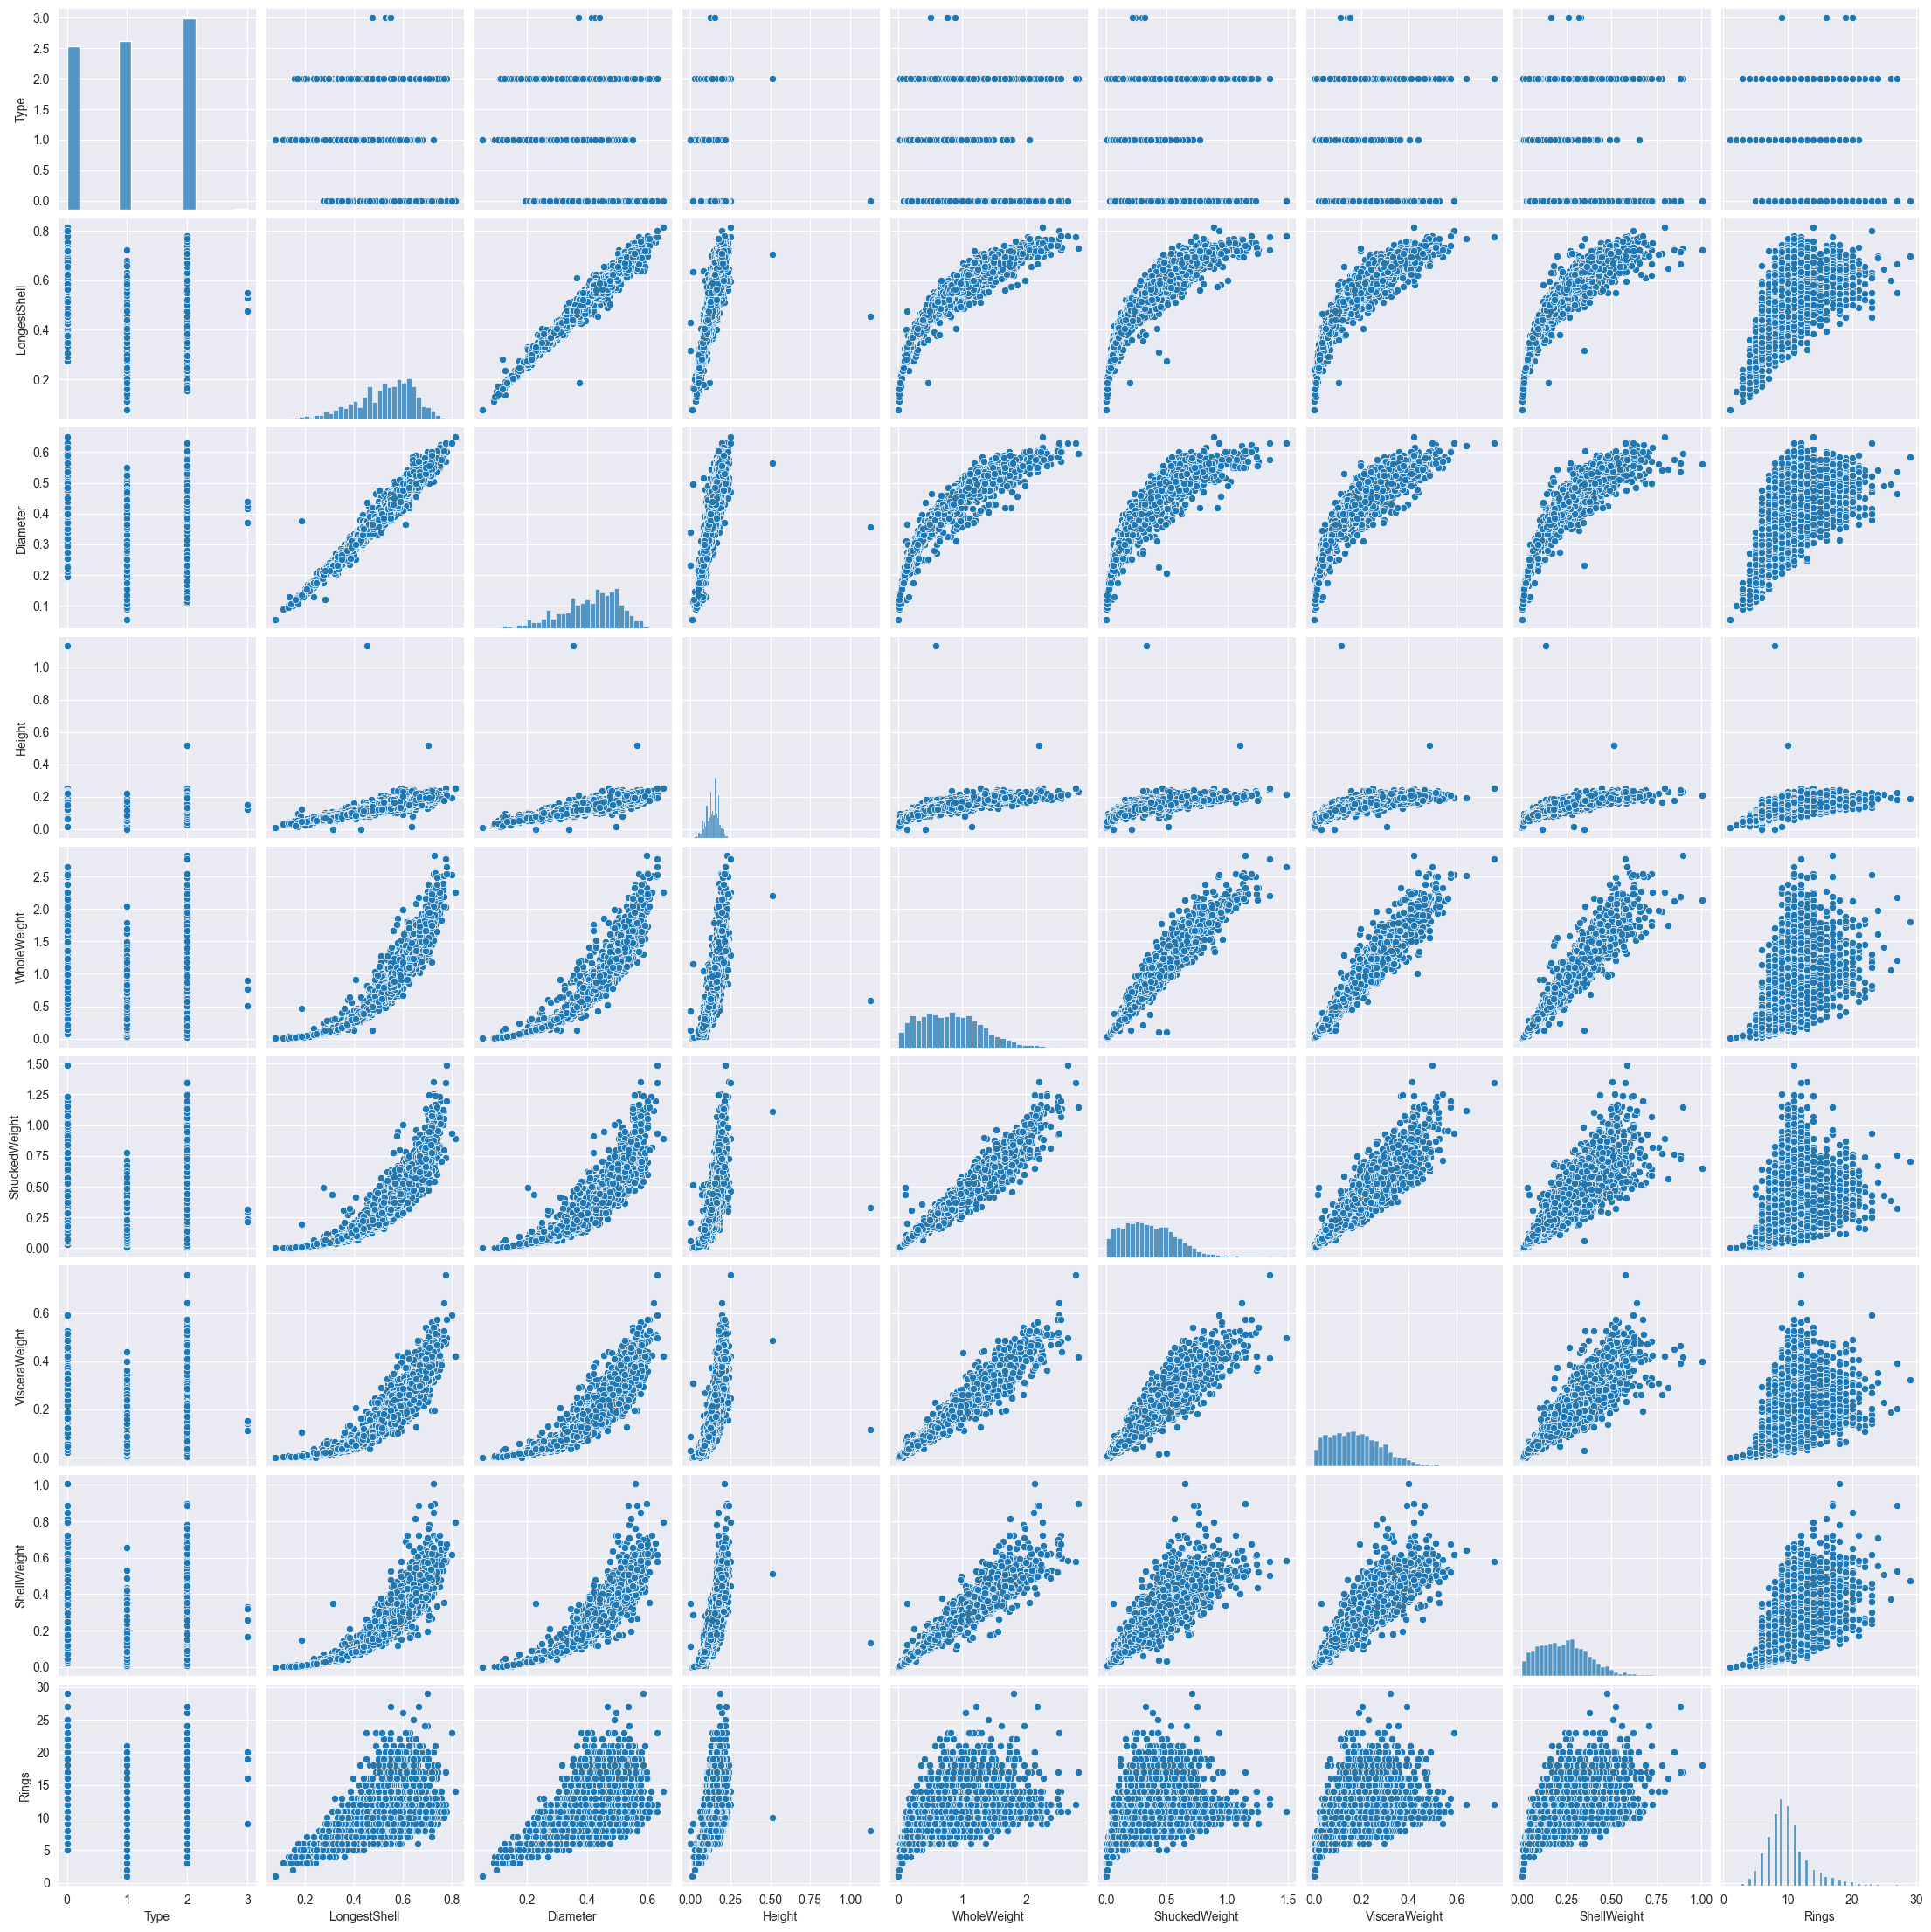

In [5]:
sns.pairplot(data=df)
plt.show()

In [6]:
df

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
x = df.drop(columns='Type')
y = df['Type']

In [8]:
x

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
y

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Type, Length: 4177, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [13]:
y.unique()

array([2, 0, 1, 3])

In [14]:
model.coef_

array([[-0.1399573 ,  0.94387215,  0.90997906,  1.01080602, -0.78136686,
         2.4826984 ,  0.89736819,  1.39788054],
       [ 1.99335391, -0.12727348, -1.20018478, -2.92816691, -1.08144889,
        -3.73308168, -1.31670197, -3.17063922],
       [-1.77759303, -0.77291252,  0.35611881,  1.95471903,  1.97560963,
         1.3638334 ,  0.33340911,  1.25903779],
       [-0.07580358, -0.04368614, -0.06591309, -0.03735814, -0.11279387,
        -0.11345012,  0.08592466,  0.51372089]])

In [15]:
model.intercept_

array([-0.6337359 ,  3.5277058 ,  1.31864421, -4.21261411])

In [16]:
y_pred = model.predict(x_test)

In [17]:
y_pred

array([2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1,
       0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0,
       1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2,
       1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,

In [18]:
print(f1_score(y_test, y_pred, average='micro'))

0.5586124401913876


In [19]:
print(accuracy_score(y_test, y_pred))

0.5586124401913876


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.27      0.35       260
           1       0.68      0.80      0.74       277
           2       0.48      0.59      0.53       298
           3       0.00      0.00      0.00         1

    accuracy                           0.56       836
   macro avg       0.41      0.41      0.40       836
weighted avg       0.55      0.56      0.54       836



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  